In [1]:
import stac
import numpy as np
from rasterio.windows import Window
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

import xarray as xr

from eocube import DataCube, config

config.ACCESS_TOKEN = "a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV"

In [2]:
eocube_service = DataCube()

In [3]:
print(eocube_service.getCollections())

['S2_MSI_L2_SR_LASRC-1', 'S2_L1C-1', 'LC8SR-1', 'LC8_DN-1', 'MOD13Q1-6', 'MYD13Q1-6', 'S2_10_16D_STK-1', 'S2-SEN2COR_10_16D_STK-1', 'S2_10-1', 'CB4MUX_20-1', 'CB4MUX_20_1M_STK-1', 'LC8_30-1', 'LC8_30_16D_STK-1', 'CB4_20_1M_STK-1', 'CB4_64_16D_STK-1', 'CB4_64-1', 'CB4-MUX-L4-SR-CMPAC-COG-1', 'CB4A-MOSAIC-PARAIBA_55_3M_STK-1', 'S2-MOSAIC-PARAIBA_10_3M_STK-1', 'CB4-MOSAIC-BRAZIL_64_3M_STK-1', 'KD_S2_20M_VISBANDS_CURUAI-1', 'LCC_S2_10_1M_STK_PA-SPC-AC-NA-1', 'LCC_C4_64_1M_STK_PA-SPC-AC-NA-1', 'LCC_L8_30_1M_STK_PA-SPC-AC-NA-1', 'LCC_C4_64_1M_STK_MT_PA-SPC-AC-NA-1', 'LCC_C4_64_1M_STK_GO_PA-SPC-AC-NA-1', 'LCC_C4_64_1M_STK_MT_RF_PA-SPC-AC-NA-1']


In [4]:
collection = eocube_service.getCollections()[0]
print(eocube_service.getDescription(collection).get('descriptions')[0].get('description'))

The Sentinel-2 SR - LaSRC/Fmask 4.2 image collection provides Bottom Of Atmosphere (BOA) reflectance images obtained from the Copernicus Open Access Hub. According to the ESA's web site, the Copernicus Sentinel-2 mission comprises a constellation of two polar-orbiting satellites placed in the same sun-synchronous orbit, phased at 180° to each other. It has a swath width of 290 km and a revisit time of 10 days at the equator with one satellite, and 5 days with 2 satellites. For more information on Sentinel-2, please, see https://sentinel.esa.int/web/sentinel/missions/sentinel-2. This dataset was processed and made available by the Brazil Data Cube project, a component of the Environmental Monitoring of Brazilian Biomes project, funded by the Amazon Fund through the financial collaboration of the Brazilian Development Bank (BNDES) and the Foundation for Science, Technology and Space Applications (FUNCATE) no. 17.2.0536.1.


In [5]:
bbox = [-56.5009689, -10.7164420, -56.3526535, -10.8238641] # Mato Grosso
# bbox = [-46.01348876953125, -23.08478515994374, -45.703125, -23.34856015148709] # Interior de SP São José

items = eocube_service.getItems(
    collections=["CB4_64_16D_STK-1"],
    bbox=bbox,
    start_date="2018-08-01",
    end_date="2019-07-31"
)

In [6]:
print(items[0]['assets']['BAND13']['href'])

https://brazildatacube.dpi.inpe.br/data/d006/Mosaic/CB4_64_16D_STK/v001/020023/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_020023_2019-07-28_2019-08-12_BAND13.tif?access_token=a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV


In [7]:
eocube_service.createCube()

True

In [9]:
data = eocube_service.getCube()[0].getBand('red')
location = eocube_service.getCube()[0].bbox
date = eocube_service.getCube()[0].item["properties"]["datetime"]
date

'2019-07-28T00:00:00'

In [10]:
data

array([[287, 307, 336, ..., 340, 328, 325],
       [275, 273, 291, ..., 329, 341, 325],
       [298, 275, 279, ..., 351, 319, 342],
       ...,
       [334, 316, 326, ..., 310, 309, 325],
       [340, 331, 336, ..., 311, 317, 302],
       [326, 338, 329, ..., 301, 292, 305]], dtype=int16)

In [11]:
locs = location.split(',')
locs

['-56.5009689', '-10.8238641', '-56.3526535', '-10.716442']

In [12]:
item = eocube_service.getCube()[0].getBand('red')
item

array([[287, 307, 336, ..., 340, 328, 325],
       [275, 273, 291, ..., 329, 341, 325],
       [298, 275, 279, ..., 351, 319, 342],
       ...,
       [334, 316, 326, ..., 310, 309, 325],
       [340, 331, 336, ..., 311, 317, 302],
       [326, 338, 329, ..., 301, 292, 305]], dtype=int16)

In [13]:
longs = [locs[0] for i in range(190)]

lats = [locs[1] for i in range(248)]


times = [date]

foo = xr.DataArray(np.array([data]), coords=[times, longs, lats], dims=["time", "longs", "lats"])
foo.attrs = items[0]
foo

<xarray.DataArray (time: 1, longs: 190, lats: 248)>
array([[[287, 307, 336, ..., 340, 328, 325],
        [275, 273, 291, ..., 329, 341, 325],
        [298, 275, 279, ..., 351, 319, 342],
        ...,
        [334, 316, 326, ..., 310, 309, 325],
        [340, 331, 336, ..., 311, 317, 302],
        [326, 338, 329, ..., 301, 292, 305]]], dtype=int16)
Coordinates:
  * time     (time) <U19 '2019-07-28T00:00:00'
  * longs    (longs) <U11 '-56.5009689' '-56.5009689' ... '-56.5009689'
  * lats     (lats) <U11 '-10.8238641' '-10.8238641' ... '-10.8238641'
Attributes:
    type:             Feature
    id:               CB4_64_16D_STK_v001_020023_2019-07-28_2019-08-12
    collection:       CB4_64_16D_STK-1
    stac_version:     0.9.0
    stac_extensions:  ['checksum', 'commons', 'eo']
    geometry:         {'type': 'Polygon', 'coordinates': [[[-54.34728, -11.14...
    bbox:             [-60.593466, -11.141578, -54.342284, -7.149712]
    properties:       {'bdc:tiles': ['020023'], 'datetime': '2019-07-28T00:00...
    assets:           {'EVI': {'href': 'https://brazildatacube.dpi.inpe.br/da...
    links:            [{'href': 'https://brazildatacube.dpi.inpe.br/stac/coll...

In [14]:
list(eocube_service.getCube()[0].bands.keys())

['blue',
 'green',
 'red',
 'nir',
 'ClearOb',
 'quality',
 'evi',
 'ndvi',
 'Provenance',
 'TotalOb']

In [15]:
raster = None
for image in eocube_service.getCube():
    if '2019-07-28T00:00:00' == image.item.get("properties").get("datetime"):
        raster = image
raster

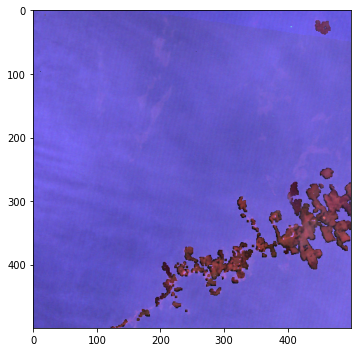

In [16]:
plt.figure(figsize=(10, 5))
plt.imshow(raster.getRGB())
plt.tight_layout()

plt.show()

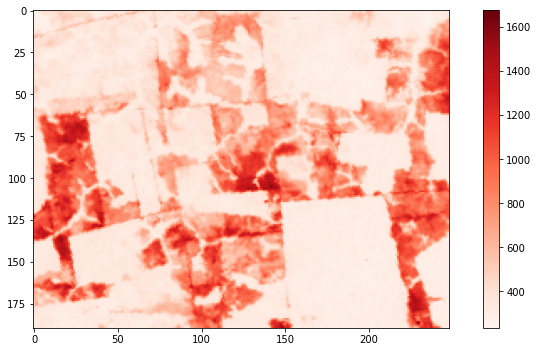

In [17]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Reds', 1000)
plt.imshow(
    raster.getBand("red"),
    cmap=colormap
)
plt.tight_layout()
plt.colorbar()

plt.show()

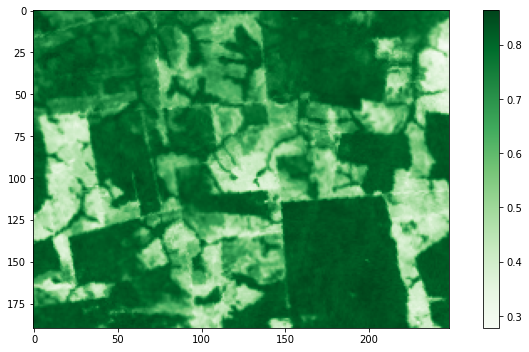

In [18]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Greens', 1000)
plt.imshow(
    raster.getNDVI(),
    cmap=colormap
)
plt.tight_layout()
plt.colorbar()

plt.show()

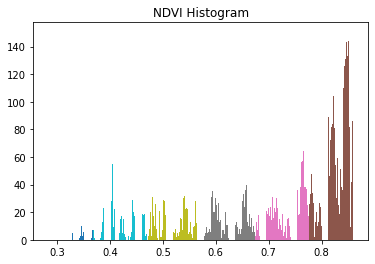

In [19]:
plt.title("NDVI Histogram")
plt.hist(raster.getNDVI())
plt.show()